In [14]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [15]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /Users/wjones/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# Data Preprocessing
path = "RottenTomatoes/DataSet/train.tsv"
df = pd.read_csv(path, sep="\t") 

# remove punctuation
df['Phrase'] = df['Phrase'].str.replace(r'[^\w\s]+', '')
# remove numbers
df['Phrase'] = df['Phrase'].str.replace(r'\d+', '')
# make it all lower case
df['Phrase'] = df['Phrase'].str.lower()
# remove non-asci characters
df.Phrase.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#df['Phrase'] = df['Phrase'].str.split()

df['Tokenized_text'] = df['Phrase'].apply(word_tokenize) 

df['Sentiment']=df['Sentiment'].astype(int) #convert the star_rating column to int
df['NNLabels'] = df['Sentiment'].div(4)

df= df[df['Sentiment']!=2]

#df['label']=np.where(df['Sentiment']>=4,1,0) #1-Positve,0-Negative
# convert to NumPy Array
#train = df['Phrase'].to_numpy()


/var/folders/01/r024mm7x74qd70l_5q2qs0hm0000gn/T/ipykernel_99148/1763359842.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phrase'] = df['Phrase'].str.replace(r'[^\w\s]+', '')
/var/folders/01/r024mm7x74qd70l_5q2qs0hm0000gn/T/ipykernel_99148/1763359842.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phrase'] = df['Phrase'].str.replace(r'\d+', '')


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(df['Phrase'], df['Sentiment'], test_size=0.2, random_state=30)
print("Train: " ,X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

X_train,X_valid,Y_train, Y_valid = train_test_split(X_train,Y_train, test_size=0.5, random_state=30)
print("Train: " ,X_train.shape,Y_train.shape,"Test: ",(X_valid.shape,Y_valid.shape))

Train:  (61182,) (61182,) Test:  ((15296,), (15296,))
Train:  (30591,) (30591,) Test:  ((30591,), (30591,))


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
Encoder = OneHotEncoder(sparse=False)
Y_train_hot = Encoder.fit_transform()

In [18]:
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import MiniBatchKMeans


In [19]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
tf_x_train = tfidfvectorizer.fit_transform(X_train)
tf_x_valid = tfidfvectorizer.transform(X_valid)

In [20]:
#from sklearn import preprocessing
#normalized_arr = preprocessing.normalize(tf_x_train.toarray())
#normalized_var = preprocessing.normalize(tf_x_valid.toarray())
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(1, 15):
    preds = []
    kmeans = MiniBatchKMeans(n_clusters=5, random_state=10, n_init=i)
    kmeans.fit(tf_x_train.toarray().astype(float))
    preds = kmeans.predict(tf_x_valid.toarray().astype(float))
    #print(preds//5)
    accuracy.append((accuracy_score(Y_valid.array, preds.astype(int)),i))


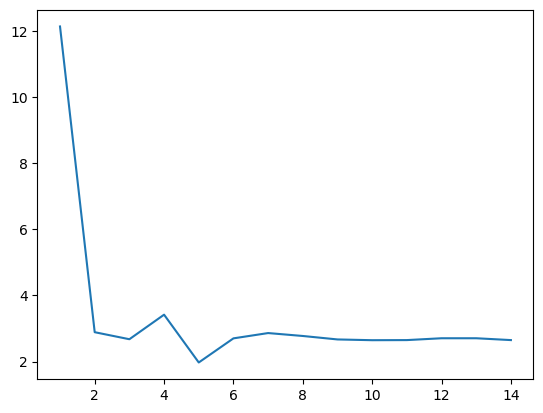

In [23]:

a1 = []
a2 = []
for i in range(len(accuracy)):
    a1.append(accuracy[i][0]*100)
    a2.append(accuracy[i][1])

import matplotlib.pyplot as plt
plt.plot(a2 ,a1)

In [24]:
from sklearn.cluster import MiniBatchKMeans
K = 37
kmeans = MiniBatchKMeans(n_clusters=K, random_state=10, n_init=1)
kmeans.fit(tf_x_train.toarray().astype(float))
preds = kmeans.predict(tf_x_valid.toarray().astype(float))

In [25]:

for i in range(len(preds)):
    preds[i] = 0 if preds[i] < K/5 else 1 if preds[i]< (2*K)/5 else 2 if preds[i] < (3*K)/5 else 3 if preds[i] < (4*K)/5 else 4



In [26]:
from sklearn.metrics import classification_report
report=classification_report(Y_valid.array, preds.astype(int),output_dict=True)
report

/Users/wjones/opt/anaconda3/envs/py4sci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wjones/opt/anaconda3/envs/py4sci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wjones/opt/anaconda3/envs/py4sci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.09328689251799034,
  'recall': 0.9971900245872849,
  'f1-score': 0.17061298076923076,
  'support': 2847},
 '1': {'precision': 0.45454545454545453,
  'recall': 0.0009163383121048291,
  'f1-score': 0.0018289894833104711,
  'support': 10913},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '3': {'precision': 0.45652173913043476,
  'recall': 0.0016030534351145038,
  'f1-score': 0.003194888178913738,
  'support': 13100},
 '4': {'precision': 0.2692307692307692,
  'recall': 0.00375234521575985,
  'f1-score': 0.007401533174729052,
  'support': 3731},
 'accuracy': 0.09427609427609428,
 'macro avg': {'precision': 0.25471697108492974,
  'recall': 0.20069235231005284,
  'f1-score': 0.036607678321236806,
  'support': 30591},
 'weighted avg': {'precision': 0.39916894220724913,
  'recall': 0.09427609427609428,
  'f1-score': 0.01880170879997552,
  'support': 30591}}

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(tf_x_train, Y_train)
y_pred = clf.predict(tf_x_valid)
acc=accuracy_score(X_valid,y_pred)
print(acc)